In [1]:
import requests
import pandas as pd
from config import gkey
from scipy import stats
from config import api_key
import numpy as np
from matplotlib import pyplot as plt
import json
import csv

## import analysisdata

In [4]:
path='C:/Users/rwang/Desktop/Mentos/mexidata.csv'
file=pd.read_csv(path)
mexidata=pd.DataFrame(file)
mexidata

,id,review,category,rating,city,lat,lon,ratingscore
0,_B1cUndZBV_6dkP6Veea4g,658,newmexican,4.0,Santa Fe,35.679130,-105.952780,0.006079
1,nFXQ5OxdpKrNp72j79EWuQ,143,mexican,4.0,Albany,42.661940,-73.769640,0.027972
2,CaBEuv0VA2UW3bh4ea9tww,101,mexican,4.5,Annapolis,38.977920,-76.536280,0.044554
3,IGvh8QfJjFecc3toQAQTHw,312,mexican,4.5,Augusta,33.513729,-82.054271,0.014423
4,k7OBrHxJcW36A6yJkWvAvA,112,mexican,4.5,Baton Rouge,30.418292,-91.142491,0.040179
5,U3oU0FMdPwUAa06sKwRRXA,36,mexican,4.0,Bismarck,46.855036,-100.770420,0.111111
6,NGFkH7NYW1qp8zfm8gyggg,53,mexican,4.5,Mandan,46.819428,-100.853875,0.084906
7,P_XUt3xD-KItQBqBKCiRGw,173,mexican,4.5,Boise,43.620076,-116.277243,0.026012
8,cXknNz7IvXv6GIXT-UbICA,168,mexican,4.5,Carson City,39.168790,-119.724730,0.026786
9,vYQw180dVmgBzjDjTbGIjQ,135,mexican,4.0,Cheyenne,41.134048,-104.810913,0.029630


## Load in weather information

In [5]:
summary=mexidata[['city',"review","rating",'lat',"lon","ratingscore"]]
summary

,city,review,rating,lat,lon,ratingscore
0,Santa Fe,658,4.0,35.679130,-105.952780,0.006079
1,Albany,143,4.0,42.661940,-73.769640,0.027972
2,Annapolis,101,4.5,38.977920,-76.536280,0.044554
3,Augusta,312,4.5,33.513729,-82.054271,0.014423
4,Baton Rouge,112,4.5,30.418292,-91.142491,0.040179
5,Bismarck,36,4.0,46.855036,-100.770420,0.111111
6,Mandan,53,4.5,46.819428,-100.853875,0.084906
7,Boise,173,4.5,43.620076,-116.277243,0.026012
8,Carson City,168,4.5,39.168790,-119.724730,0.026786
9,Cheyenne,135,4.0,41.134048,-104.810913,0.029630


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="
cities=summary["city"]

In [7]:
temp=[]
humidity=[]
windspeed=[]
cloudness=[]

for city in cities:
    response = requests.get(query_url+city).json()
    try:
        temp.append(response["main"]['temp'])
        humidity.append(response["main"]['humidity'])
        windspeed.append(response["wind"]['speed'])
        cloudness.append(response["clouds"]['all'])
    except:
        temp.append(np.nan)
        humidity.append(np.nan)
        windspeed.append(np.nan)
        cloudness.append(np.nan)

In [8]:
summary['temp']=temp
summary['humidity']=humidity
summary['windspeed']=windspeed
summary['cloudness']=cloudness
regressdata=summary.dropna()
regressdata

C:\Users\rwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,review,rating,lat,lon,ratingscore,temp,humidity,windspeed,cloudness
0,Santa Fe,658,4.0,35.679130,-105.952780,0.006079,297.07,90,1.58,15
1,Albany,143,4.0,42.661940,-73.769640,0.027972,279.21,70,2.60,90
2,Annapolis,101,4.5,38.977920,-76.536280,0.044554,285.41,93,1.50,90
3,Augusta,312,4.5,33.513729,-82.054271,0.014423,272.99,81,4.10,100
4,Baton Rouge,112,4.5,30.418292,-91.142491,0.040179,293.88,49,3.10,90
5,Bismarck,36,4.0,46.855036,-100.770420,0.111111,278.92,52,3.10,1
6,Mandan,53,4.5,46.819428,-100.853875,0.084906,278.90,56,5.10,1
7,Boise,173,4.5,43.620076,-116.277243,0.026012,282.49,61,4.60,1
8,Carson City,168,4.5,39.168790,-119.724730,0.026786,277.21,42,2.60,1
9,Cheyenne,135,4.0,41.134048,-104.810913,0.029630,277.23,35,3.60,90


## Plot weather information vs ratingscore

Text(0, 0.5, 'ratingscore')

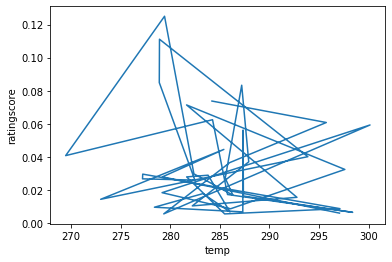

In [9]:
plt.plot(regressdata["temp"],regressdata["ratingscore"])
plt.xlabel("temp")
plt.ylabel("ratingscore")

Text(0, 0.5, 'ratingscore')

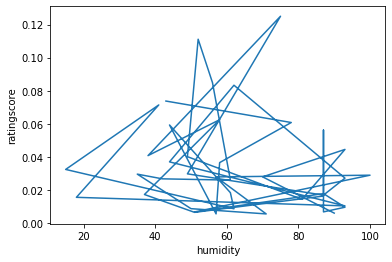

In [10]:
plt.plot(regressdata["humidity"],regressdata["ratingscore"])
plt.xlabel("humidity")
plt.ylabel("ratingscore")

Text(0, 0.5, 'ratingscore')

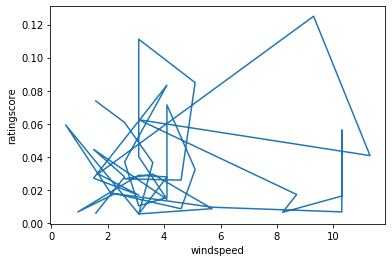

In [11]:
plt.plot(regressdata["windspeed"],regressdata["ratingscore"])
plt.xlabel("windspeed")
plt.ylabel("ratingscore")

Text(0, 0.5, 'ratingscore')

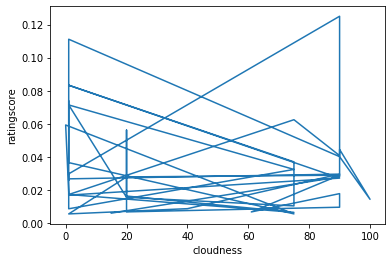

In [12]:
plt.plot(regressdata["cloudness"],regressdata["ratingscore"])
plt.xlabel("cloudness")
plt.ylabel("ratingscore")

## Regression between tempurature and ratingscore

In [17]:
from scipy.stats import linregress
x=summary["temp"]
y=summary["ratingscore"]
results=linregress(x,y)
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regressvalue=x*slope+intercept
lineeq=f"y={slope:.4f}x+{intercept:.2f}"
lineeq

'y=-0.0006x+0.20'

In [22]:
x2=summary["humidity"]
y2=summary["ratingscore"]
results2=linregress(x2,y2)
(slope2,intercept2,rvalue2,pvalue2,stderr2)=linregress(x2,y2)
regressvalue2=x2*slope2+intercept2
lineeq2=f"y={slope2:.4f}x+{intercept2:.2f}"
lineeq2

'y=-0.0002x+0.05'

In [23]:
x3=summary["windspeed"]
y3=summary["ratingscore"]
results3=linregress(x3,y3)
(slope3,intercept3,rvalue3,pvalue3,stderr3)=linregress(x3,y3)
regressvalue3=x3*slope3+intercept3
lineeq3=f"y={slope3:.4f}x+{intercept3:.3f}"
lineeq3

'y=0.0004x+0.033'

In [24]:
x4=summary["cloudness"]
y4=summary["ratingscore"]
results4=linregress(x4,y4)
(slope4,intercept4,rvalue4,pvalue4,stderr4)=linregress(x4,y4)
regressvalue4=x4*slope4+intercept4
lineeq4=f"y={slope4:.4f}x+{intercept4:.4f}"
lineeq4

'y=-0.0001x+0.0393'

#### For mexican restaurant , ratingscore tends to have a negative relation with tempurature , humidity and cloudness of a city, but shows positive relation wtih windspeed in the city  